# KAZNIVA DEJANJA V SLOVENIJI

## 1. Predprocesiranje podatkov

Podatki so zbrani v 10 csv datotekah, pri čemer vsaka predstavlja po eno leto (od 2009 do 2019). Podatke iz teh datotek najprej zberemo en sam DataFrame. Spremenimo tudi nekatere atribute.   
Funkcija *get_df()* se izvaja okoli 20 sekund. 

In [1]:
import pandas as pd

In [2]:
def parse_ura_storitve(series):
    ure = []
    for i, val in series.items():
        ure.append(int(val.split(":")[0]))
    return pd.Series(ure, dtype="int")

def get_df():
    df = None
    df_set = False
    for year in range(2009, 2020):
        df_temp = pd.read_csv("../PR21NCMSTK/data/kd" + str(year) + ".csv",
                              delimiter=";",
                              encoding="windows-1250",
                              low_memory=False,
                              dtype={"DatumStoritve": "string",
                                     "MesecStoritve": "string",
                                     "UraStoritve": "string",})
        df_temp.iloc[:, 0] = df_temp.iloc[:, 0] + year * 1000_000
        df_temp.iloc[:, 2] = parse_ura_storitve(df_temp.iloc[:, 2])
        df_temp.iloc[:, 3] = df_temp.iloc[:, 3].replace(["PONEDELJEK",
                                                         "TOREK",
                                                         "SREDA",
                                                         "ČETRTEK",
                                                         "PETEK",
                                                         "SOBOTA",
                                                         "NEDELJA"], [1, 2, 3, 4, 5, 6, 7]).astype(int)

        df_temp.iloc[:, 5] = df_temp.iloc[:, 5].replace(["DA", "NE"], [1, 0]).astype("bool")
        df_temp.iloc[:, 8] = df_temp.iloc[:, 8].replace(["GOSPODARSKA", "SPLOŠNA"], [1, 0]).astype("bool")
        df_temp.iloc[:, 9] = df_temp.iloc[:, 9].replace(["ORGANIZIRANA", " "], [1, 0]).astype("bool")
        df_temp.iloc[:, 10] = df_temp.iloc[:, 10].replace(["MLADOLETNIŠKA", " "], [1, 0]).astype("bool")
        df_temp.iloc[:, 11] = df_temp.iloc[:, 11].replace(["DA", "NE"], [1, 0]).astype("bool")


        df_temp.columns = ["ZaporednaStevilkaKD",
                          "MesecStoritve",
                          "UraStoritve",
                          "DanVTednu",
                          "PUStoritveKD",
                          "Povratnik",
                          "OpisKD",
                          "PoglavjeKD",
                          "GospodarskiKriminal",
                          "OrganiziranKriminal",
                          "MladoletniskaKriminaliteta",
                          "Poskus",
                          "KriminalisticnaOznacba1",
                          "KriminalisticnaOznacba2",
                          "KriminalisticnaOznacba3",
                          "UporabljenoSredstvo1",
                          "UporabljenoSredstvo2",
                          "UporabljenoSredstvo3",
                          "UporabljenoSredstvo4",
                           "UpravnaEnotaStoritve",
                           "OpisKraja",
                           "LetoZakljucenegaDokumenta",
                           "VrstaZakljucenegaDokumenta",
                           "ZaporednaStevilkaOsebeVKD",
                           "VrstaOsebe",
                           "StarostniRazred",
                           "Spol",
                           "Drzavljanstvo",
                           "Poskodba",
                           "VplivAlkohola",
                           "VplivMamil",
                           "OrganiziranaZdruzba",
                           "Skoda"
                           ]

        if not df_set:
            df = df_temp
            df_set = True
        else:
            df = df.append(df_temp, ignore_index=True)

    return df


df = get_df()
df.iloc[:, 0:4]

,ZaporednaStevilkaKD,MesecStoritve,UraStoritve,DanVTednu
0,2009000001,03.2002,0,5
1,2009000001,03.2002,0,5
2,2009000002,06.2002,15,2
3,2009000003,07.2002,17,4
4,2009000003,07.2002,17,4
...,...,...,...,...
1556134,2019061193,11.2019,23,3
1556135,2019061193,11.2019,23,3
1556136,2019061193,11.2019,23,3
1556137,2019061194,09.2016,0,5


In [3]:
def fill_nan(n):
    df.iloc[:, n] = df.iloc[:, n].fillna("Ni podatka")

def print_atribut(n):
    print("- Vrednosti:")
    print(df.iloc[:, n], end="\n\n")
    print("- Število neznanih vrednosti: ")
    print(df.loc[df.iloc[:, n].isnull()].iloc[:, n].size, end="\n\n")
    print("- Unikatne vrednosti: ")
    print(df.iloc[:, n].unique())
    print(len(df.iloc[:, n].unique()))

for i in range(33): fill_nan(i)

In [4]:
print_atribut(23)

- Vrednosti:
0                   1
1                   2
2                   1
3                   1
4                   2
              ...    
1556134    6.1193e+07
1556135    6.1193e+07
1556136    6.1193e+07
1556137    6.1194e+07
1556138    6.1194e+07
Name: ZaporednaStevilkaOsebeVKD, Length: 1556139, dtype: object

- Število neznanih vrednosti: 
0

- Unikatne vrednosti: 
[1.0 2.0 3.0 ... 61168003.0 61186003.0 61193005.0]
326676


#### Novi atributi
*0. ZaporednaStevilkaKD*: 
- Tip: int64. 
- Vrednosti: od 2009000001 do 2019061194. 
- Obrazložitev: Ker se zaporedne številke resetirajo vsako leto, jih spremenimo tako, da se začnejo z letom, ko je bil podatek zapisan v tabelo (npr. ID 61193 iz leta 2019 postane 2019061193). Ni neznanoh vrednosti.

*1. MesecStoritve*: 
-  Tip: string. 
- Primer vrednosti: 03.2002
- Ni neznanih vrednosti. 

*2. UraStoritve*: 
- Tip: int64 
- Vrednosti: 0 - 23
- Ni neznanih vrednosti. 

*3. DanVTednu*: 
- int64 
- Vrednosti: 0 - 7
- Ni neznanih vrednosti. 

*4. PUStoritveKD*: 
- Tip: string 
- Primer vrednosti: "PU LJUBLJANA"
 
*5. Povratnik*: 
- Tip: bool
- Ni neznanih vrednosti. 

*6. OpisKD*: 
- Tip: string
- Primer vrednosti: "KZ12/204*/2/S/ - TATVINA"
- Ni neznanih vrednosti. 

*7. PoglavjeKD*: 
- Tip: object
- Primer vrednosti: "KD ZOPER GOSPODARSTVO"
- Zelo malo neznanih vrednosti
- Neznane vrednosti nastavimo na "unknown"

*8. GospodarskiKriminal*:
- Tip: bool
- Ni neznanih vrednosti
- Obrazložitev: če gre za gospodarski krimal, je vrednost atributa True

*9. OrganiziraniKriminal*:
- Tip: bool
- Ni neznanih vrednosti

*10. MladoletnikaKriminaliteta*: 
- Tip: bool
- Ni neznanih vrednosti

*11. Poskus*: 
- Tip: bool
- Ni neznanih vrednosti

*12. KriminalistinaOznacba1*:
- Tip: object
- Primer vrednosti: "DAVKA NA DODANO VREDNOST - O"
- Neznane vrednosti nastavimo na "unknown"

*13. KriminalisticnaOznacba2*

*14. KriminalisticnaOznacba3*

*15. UporabljenoSredstvo1*:
- Tip: Object
- Primer vrednosti: "152-LISTINE"
- Neznane vrednosti nastavimo na "unknown" 

*16. UporabljenoSredstvo2*

*17. UporabljenoSredstvo3*

*18. UporabljenoSredstvo4*

*19. UpravnaEnotaStoritve*: 
- Tip: Object
- Primer vrednosti: "CELJE"
- Ni neznanih vrednosti

*20. OpisKraja*: 
- Tip: Object

*21. LetoZakljucnegaDokumenta*: 
- Tip: int64
- Vrednosti: 2009 - 2019
- Ni neznanih vrednosti

*22. VrstaZakljucnegaDokumenta*: 
- Tip: Object

*23. ZaporednaStevilkaOsebeVKD*: 
- Tip: float64

*24. VrstaOsebe*: 
- Tip: object

*25. StarostniRazred*: 
- Tip: object

*26. Spol*: 
- Tip: object

*27. Drzavljanstvo*: 
- Tip: object

*28. Poskodba*: 
- Tip: object

*29. VplivAlkohola*: 
- Tip: object

*30. VplivMamil*: 
- Tip: object

*31. OrganiziranaZdruzba*: 
- Tip: object

*32. Skoda*: 
- Tip: object


## 2. Analiza podatkov

### Ali je število zločinov odvisno od dneva v tednu?

In [5]:
import numpy as np
%matplotlib inline
%config InlineBackend.figure_formats = ['jpg']
import matplotlib
matplotlib.figure.Figure.__repr__ = lambda self: (
    f"<{self.__class__.__name__} size {self.bbox.size[0]:g}"
    f"x{self.bbox.size[1]:g} with {len(self.axes)} Axes>")
import matplotlib.pyplot as plt

In [6]:
df2 = df.to_numpy()
df2

array([[2009000001, '03.2002', 0, ..., 'NN', 'NE', 'BREZ'],
       [2009000001, '03.2002', 0, ..., 'NN', 'NE', '100 - 1.000 EUR'],
       [2009000002, '06.2002', 15, ..., 'NN', 'NE', '100 - 1.000 EUR'],
       ...,
       [2019061193, '11.2019', 23, ..., 'NN', 'NE', 'DO 100 EUR'],
       [2019061194, '09.2016', 0, ..., 'NN', 'NE', 'BREZ'],
       [2019061194, '09.2016', 0, ..., 'NN', 'NE', 'BREZ']], dtype=object)

Najprej nas zanima, na kateri dan v tednu se zgodi največ zločinov skozi vsa dokumentirana leta.

In [7]:
pojavitevDnevi = dict()
for i in range(1, 8):
    pojavitevDnevi[i] = 0

for row in df2:
    pojavitevDnevi[row[3]] += 1

print("Število storjenih zločinov na določen dan v tednu:")
for dan in pojavitevDnevi:
    print(dan,":", pojavitevDnevi[dan])

Število storjenih zločinov na določen dan v tednu:
1 : 246792
2 : 235250
3 : 240599
4 : 238423
5 : 250866
6 : 184755
7 : 159454


Text(0.5, 1.0, 'Prikaz števila storjenih zločinov na določen dan v tednu')

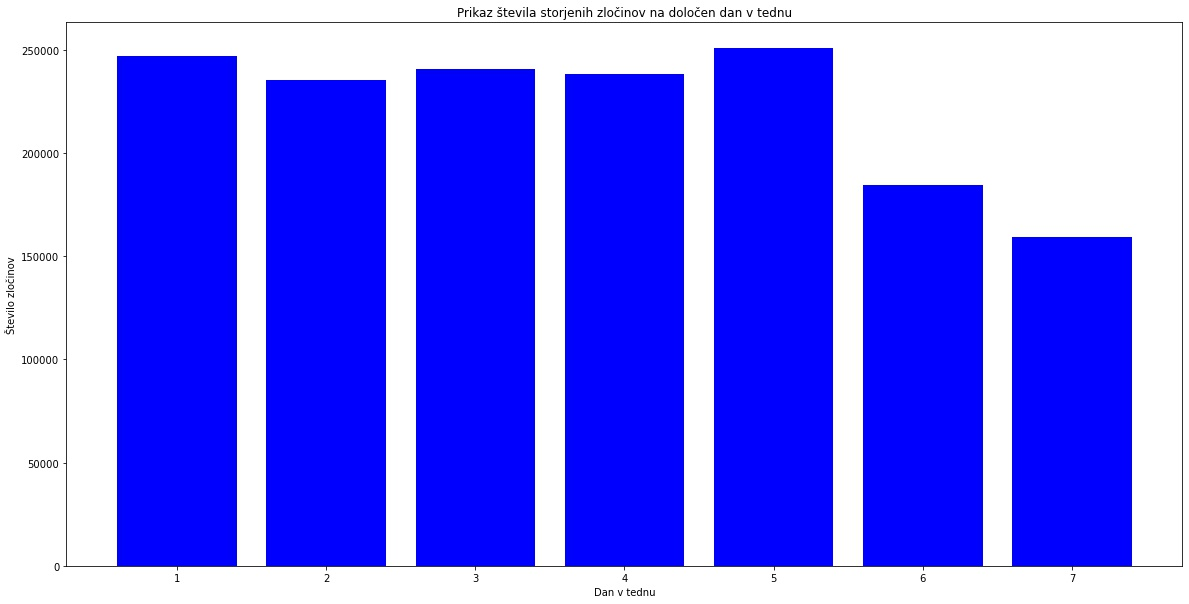

In [8]:
plt.figure(figsize=(20,10))
plt.bar(pojavitevDnevi.keys(), pojavitevDnevi.values(), color='b')
plt.xlabel('Dan v tednu')
plt.ylabel('Število zločinov')
plt.title('Prikaz števila storjenih zločinov na določen dan v tednu')

Iz grafa je razvidno, da je največ zločinov storjenih ob petkih, najmanj pa med vikendom.

### Katera so najbolj pogosta kazniva dejanja?

<BarContainer object of 20 artists>

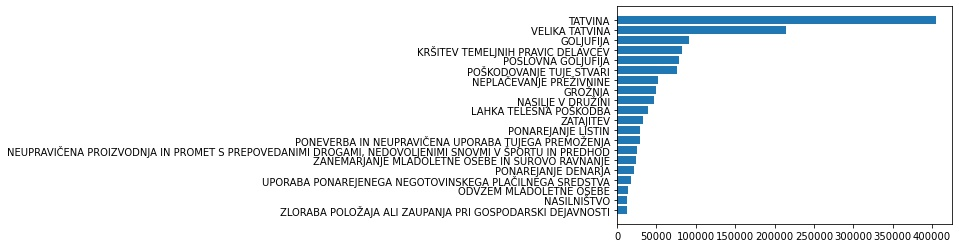

In [9]:
from collections import defaultdict
ids = np.array(df.iloc[:, 6])
d = defaultdict(int)
for i in ids:
    d[i] += 1
d2 = defaultdict(int)
for k, v in d.items():
    d2[k.split(" - ")[-1]] += v

arr = sorted([(v, k) for k, v in d2.items()])[-20:]
amounts = [amount for amount, title in arr]
titles = [title for amount, title in arr]

fig, ax = plt.subplots()
ax.barh(titles, amounts)

## 3. Nasilje v kaznivih dejanjih

### 3.1 Analiza najbolj nasilnih dejanj

In [10]:
# Grupiranje po podskupinah

poskodbe = df.loc[(~df['Poskodba'].isin(['Ni podatka', 'BREZ POŠKODBE']))]

kaznivaDejanja = set()

for i, opisKD in poskodbe[['OpisKD']].iterrows():
    normalisedValue = opisKD.values[0].split(' - ')[-1].strip()
    kaznivaDejanja.add(normalisedValue)
    poskodbe.at[i, 'OpisKD'] = normalisedValue
print(f"Tipov kaznvih dejanj: {len(kaznivaDejanja)}")

Tipov kaznvih dejanj: 82


In [11]:
top5_dejanja_s_poskodbo = poskodbe.groupby(['OpisKD', 'Poskodba'], as_index=False)['Poskodba'].count()
top5_dejanja_s_poskodbo = top5_dejanja_s_poskodbo.sort_values(by="Poskodba", ascending=False).head(5)
top5_dejanja_s_poskodbo

,OpisKD,Poskodba
23,LAHKA TELESNA POŠKODBA,17605
43,NASILNIŠTVO,3169
7,HUDA TELESNA POŠKODBA,1752
40,NASILJE V DRUŽINI,1613
111,PREPREČITEV URADNEGA DEJANJA ALI MAŠČEVANJE UR...,558


Iz zgornje tabele smo ugotovili, da se že posamezna kazniva klasificirajo po tipu poškodbe, ki je bila zadana žrtvi med dejanjem. Da bi dobili boljši vpogled v druge oblike nasilja, smo iz množice odvzeli opise kaznivih dejanj, ki so poimenovani po tipu poškodbe.

### 3.2 Napovedni model poškodbe ob kaznivem dejanju

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
import squarify
import json

In [13]:
poskodbe_df = df.loc[(df['Poskodba'] != 'Ni podatka')]
print(f"Za učenje modele bomo uporabili zgolj tiste primere za katere imamo podatek o poškodbi žrtve. Takih primerov je {poskodbe_df.shape[0]}")

Za učenje modele bomo uporabili zgolj tiste primere za katere imamo podatek o poškodbi žrtve. Takih primerov je 625416


In [14]:
def tabelaricniPrikazPoskodb(df):
    t_df = df.groupby('Poskodba')['Poskodba'].count()
    vse_poskodbe = poskodbe_df.shape[0];
    M = []
    for item in t_df.iteritems():
        poskodba, stevilo = item
        delez = stevilo / vse_poskodbe * 100;
        row = [poskodba, stevilo, delez]
        M.append(row)
    tab = pd.DataFrame(M, columns=["Poskodba", "Število poškodb", "Delež (v %)"])
    return tab.sort_values(ascending=False, by="Delež (v %)").reset_index(drop=True)

def izrisTreemapaPoskodb(df, tab, colors = ['steelblue', 'lightcoral', 'peachpuff', 'black', 'orange']):
    x = df.groupby('Poskodba').size()

    labels = []
    values = []

    for indx, row in tab.iterrows():
        poskodba, stevilo, delez = row.values
        labels.append(f"{poskodba} ({str(stevilo)} | {delez:.1f}%)")
        values.append(delez)

    plt.figure(figsize=(12,10), dpi= 80)
    ax = squarify.plot(sizes=values, label=[], color=colors, alpha=.8)
    plt.title('Porazdelitev število kaznivih dejanj glede na vrsto poškodbe')
    plt.axis('off')

    plt.legend(handles=ax.containers[0], labels=labels)

    plt.show()

In [15]:
print("Tabelaričen prikaz število kaznivih dejanj glede na vrsto poškodbe.\n")
tab = tabelaricniPrikazPoskodb(poskodbe_df)
print(tab)

Tabelaričen prikaz število kaznivih dejanj glede na vrsto poškodbe.

                    Poskodba  Število poškodb  Delež (v %)
0              BREZ POŠKODBE           596640    95.398902
1     LAHKA TELESNA POŠKODBA            25398     4.060977
2      HUDA TELESNA POŠKODBA             2609     0.417162
3            SMRTNA POŠKODBA              627     0.100253
4  POSEBNO HUDA TEL.POŠKODBA              142     0.022705


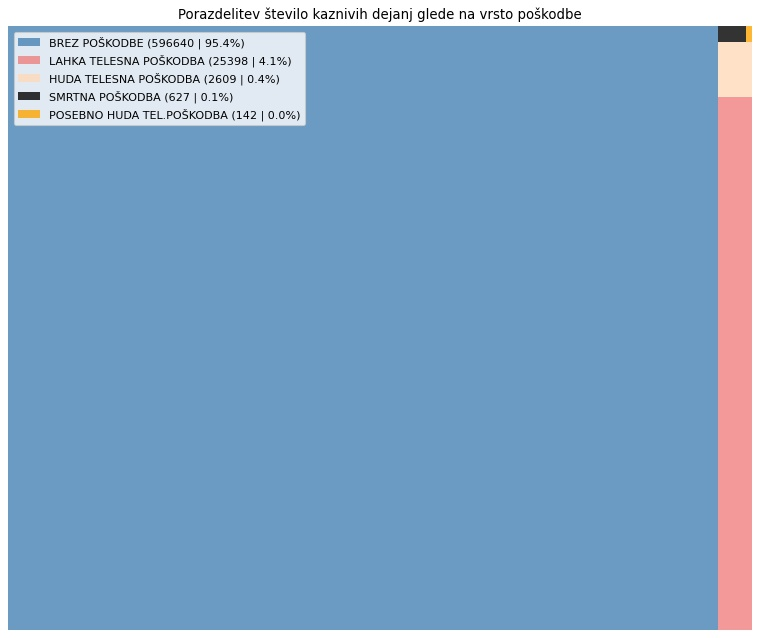

In [16]:
izrisTreemapaPoskodb(poskodbe_df, tab)

In [17]:
# atributi, ki nas zanimajo pri napovedovanju
prediction_attr = poskodbe_df[['StarostniRazred', 'Spol', 'UraStoritve', 'DanVTednu']]

print(f"Atributi, ki jih bomo uporabili za napoved tipa poškodbe so: {prediction_attr.columns.values}")
print("\nPrimer vrednosti:")
prediction_attr

Atributi, ki jih bomo uporabili za napoved tipa poškodbe so: ['StarostniRazred' 'Spol' 'UraStoritve' 'DanVTednu']

Primer vrednosti:


,StarostniRazred,Spol,UraStoritve,DanVTednu
2,44-54,MOŠKI,15,2
7,54-64,MOŠKI,18,2
8,24-34,MOŠKI,18,2
10,14-16,MOŠKI,16,6
11,24-34,ŽENSKI,15,1
...,...,...,...,...
1556131,34-44,ŽENSKI,0,2
1556133,34-44,ŽENSKI,23,3
1556134,16-18,ŽENSKI,23,3
1556135,07-14,ŽENSKI,23,3


Ker sta starostni razred in spol opisna kategorična podatka, jih moramo prej ustrezno pripraviti, da jih lahko uporabimo v učenju napovednega modela.

In [18]:
# Priprava kategoricnega atributa
def MapCategoryValues(df, attr):
    value = 0
    mapping = {}
    for item in df[[attr]].squeeze().unique():
        mapping[item] = value 
        value +=1
    return mapping

In [19]:
spolMapping = MapCategoryValues(prediction_attr, 'Spol')

prediction_attr[['Spol']] = prediction_attr.Spol.map(spolMapping)

print(prediction_attr.head(10))

   StarostniRazred  Spol  UraStoritve  DanVTednu
2            44-54     0           15          2
7            54-64     0           18          2
8            24-34     0           18          2
10           14-16     0           16          6
11           24-34     1           15          1
13           18-24     1            9          7
18           44-54     0            8          5
20           24-34     0           13          2
22           34-44     0            0          2
23           24-34     0           15          5


<ipython-input-19-f0659502f75e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction_attr[['Spol']] = prediction_attr.Spol.map(spolMapping)
C:\Users\Martin\miniconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [20]:
starostMapping = MapCategoryValues(prediction_attr, 'StarostniRazred')
prediction_attr[['StarostniRazred']]= prediction_attr.StarostniRazred.map(starostMapping)
prediction_attr

<ipython-input-20-c8d144db8946>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction_attr[['StarostniRazred']]= prediction_attr.StarostniRazred.map(starostMapping)
C:\Users\Martin\miniconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,StarostniRazred,Spol,UraStoritve,DanVTednu
2,0,0,15,2
7,1,0,18,2
8,2,0,18,2
10,3,0,16,6
11,2,1,15,1
...,...,...,...,...
1556131,5,1,0,2
1556133,5,1,23,3
1556134,7,1,23,3
1556135,8,1,23,3


In [21]:
X = prediction_attr.values # data
y = poskodbe_df['Poskodba'].values #target

clf = RidgeClassifier()


def trainModel(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    model = clf.fit(X_train, y_train)
    model_acc = model.score(X_test, y_test)
    print(f"Model natreniran, natančnost modela: ~ {model_acc:0.5f}%")
    return model

model = trainModel(X, y)

Model natreniran, natančnost modela: ~ 0.95437%


### Napovedovanje z modelom

Za napovedovanje bomo uporabili 5 primerov in sicer:

```
PRIMER 1 -> Žrtev je moški star 30 let in je žrtev kriminalnega dejanja v petek ob 20.00
PRIMER 2 -> Žrtev je ženska stara 16 let in je žrtev kriminalnega dejanja v ponedeljek ob 08.00
PRIMER 3 -> Žrtev je moški star 72 let in je žrtev kriminalnega dejanja v petek ob 20.00
PRIMER 4 -> Žrtev je moški star 48 let in je žrtev kriminalnega dejanja v nedeljo ob 23.00
PRIMER 5 -> Žrtev je ženska star 48 let in je žrtev kriminalnega dejanja v nedeljo ob 23.00
```
Za vstavljanje posamezih parametrov se moramo spomniti na mapping slovarje, ki smo jih ustvarili za preoblikovanje kategoričnih podatkov za starost in spol. Izpis mapping slovarja v JSON obliki:

Kazalna (mapping) tabela za spol:
```json
{
  "MOŠKI": 0,
  "ŽENSKI": 1,
  "NEZNAN": 2
}
```

Kazalna (mapping) tabela za starostne skupine:
```json
{
  "44-54": 0,
  "54-64": 1,
  "24-34": 2,
  "14-16": 3,
  "18-24": 4,
  "34-44": 5,
  "NAD 64": 6,
  "16-18": 7,
  "07-14": 8,
  "NI PODATKA": 9,
  "00-07": 10,
  "NI POJAVA": 11
}
```

In [22]:
#print("Kazalna (mapping) tabela za spol:\n",json.dumps(spolMapping, sort_keys=False, indent=2, ensure_ascii=False))
#print("\nKazalna (mapping) tabela za starostne skupine:\n",json.dumps(starostMapping, sort_keys=False, indent=2, ensure_ascii=False))

In [23]:
#Primeri
p1_text = "PRIMER 1 -> Žrtev je moški star 30 let in je žrtev kriminalnega dejanja v petek ob 20.00"
p2_text = "PRIMER 2 -> Žrtev je ženska stara 16 let in je žrtev kriminalnega dejanja v ponedeljek ob 08.00"
p3_text = "PRIMER 3 -> Žrtev je moški star 72 let in je žrtev kriminalnega dejanja v petek ob 20.00"
p4_text = "PRIMER 4 -> Žrtev je moški star 48 let in je žrtev kriminalnega dejanja v nedeljo ob 23.00"
p5_text = "PRIMER 5 -> Žrtev je ženska star 48 let in je žrtev kriminalnega dejanja v nedeljo ob 23.00"

primeri_text = [p1_text, p2_text, p3_text, p4_text, p5_text]

def primeriToString(primeri_text):
    for primer in primeri_text:
        print(primer + "\n")
primeriToString(primeri_text)

def prettyPrintPrediction(primeri_text, predictions):
    i = 0
    for primer in primeri_text:
        txt = primer.split("->")[1]
        print(txt + " -> " + predictions[i])
        i += 1
        
# Primeri z vneseni v vektorje upoštevajoč mapping tabele

p1 = np.array([2, 0, 20, 5])

p2 = np.array([3, 1, 8, 1])

p3 = np.array([6, 0, 20, 5])

p4 = np.array([0, 0, 22, 7])

p5 = np.array([0, 1, 22, 7])

primeri = np.array([p1, p2, p3, p4 , p5])

print("Primeri z vneseni v vektorje upoštevajoč mapping tabele\n", primeri)

PRIMER 1 -> Žrtev je moški star 30 let in je žrtev kriminalnega dejanja v petek ob 20.00

PRIMER 2 -> Žrtev je ženska stara 16 let in je žrtev kriminalnega dejanja v ponedeljek ob 08.00

PRIMER 3 -> Žrtev je moški star 72 let in je žrtev kriminalnega dejanja v petek ob 20.00

PRIMER 4 -> Žrtev je moški star 48 let in je žrtev kriminalnega dejanja v nedeljo ob 23.00

PRIMER 5 -> Žrtev je ženska star 48 let in je žrtev kriminalnega dejanja v nedeljo ob 23.00

Primeri z vneseni v vektorje upoštevajoč mapping tabele
 [[ 2  0 20  5]
 [ 3  1  8  1]
 [ 6  0 20  5]
 [ 0  0 22  7]
 [ 0  1 22  7]]


In [24]:
predictions = model.predict(primeri)
prettyPrintPrediction(primeri_text, predictions)

 Žrtev je moški star 30 let in je žrtev kriminalnega dejanja v petek ob 20.00 -> BREZ POŠKODBE
 Žrtev je ženska stara 16 let in je žrtev kriminalnega dejanja v ponedeljek ob 08.00 -> BREZ POŠKODBE
 Žrtev je moški star 72 let in je žrtev kriminalnega dejanja v petek ob 20.00 -> BREZ POŠKODBE
 Žrtev je moški star 48 let in je žrtev kriminalnega dejanja v nedeljo ob 23.00 -> BREZ POŠKODBE
 Žrtev je ženska star 48 let in je žrtev kriminalnega dejanja v nedeljo ob 23.00 -> BREZ POŠKODBE


Po pričakovanjih je model za vseh **5** namišljenih primerov napovedal, da bo žrtev kriminalno dejanje odneslo **BREZ POŠKODBE**, kar je razvidno tudi iz historičnih podatkov, saj kar v **95.4%** kriminalnih dejanjih v Sloveniji ni poškodb žrtev.

Na podlagi ugotovljenega, nas je zanimalo kakšne pa napovedi za primere, ko pa so poškodbe neizogibne.

### Prilagodimo model na napovedovanje kritičnosti poškodbe

**Ponovimo postopek, vendar tokrat upoštevamo zgolj kriminalna dejanja, kjer je prišlo do poškodbe.**

In [25]:
poskodbe_df = poskodbe_df.loc[(~df['Poskodba'].isin(['Ni podatka', 'BREZ POŠKODBE']))]
print("Tabelaričen prikaz število kaznivih dejanj glede na vrsto poškodbe.\n")
tab = tabelaricniPrikazPoskodb(poskodbe_df)
print(tab)

Tabelaričen prikaz število kaznivih dejanj glede na vrsto poškodbe.

                    Poskodba  Število poškodb  Delež (v %)
0     LAHKA TELESNA POŠKODBA            25398    88.261051
1      HUDA TELESNA POŠKODBA             2609     9.066583
2            SMRTNA POŠKODBA              627     2.178899
3  POSEBNO HUDA TEL.POŠKODBA              142     0.493467


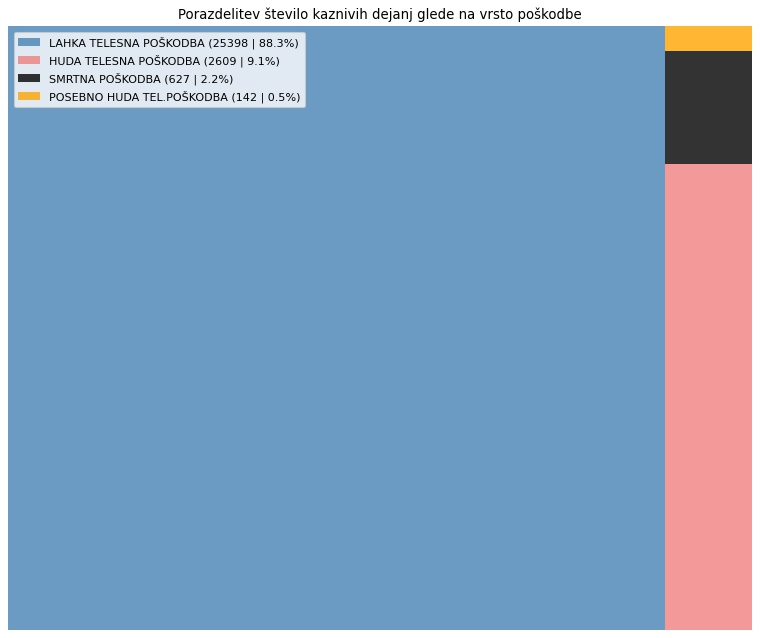

In [26]:
izrisTreemapaPoskodb(poskodbe_df, tab, colors=['steelblue', 'lightcoral', 'black', 'orange'])

In [27]:
prediction_attr = poskodbe_df[['StarostniRazred', 'Spol', 'UraStoritve', 'DanVTednu']]

prediction_attr[['Spol']] = prediction_attr.Spol.map(spolMapping)
prediction_attr[['StarostniRazred']] = prediction_attr.StarostniRazred.map(starostMapping)

X = prediction_attr.values # data
y = poskodbe_df['Poskodba'].values # target

model1 = trainModel(X, y)

Model natreniran, natančnost modela: ~ 0.87795%


<ipython-input-27-80c706d293e1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction_attr[['Spol']] = prediction_attr.Spol.map(spolMapping)
C:\Users\Martin\miniconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
<ipython-input-27-80c706d293e1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [28]:
prediction2 = model1.predict(primeri)
prettyPrintPrediction(primeri_text, prediction2)

 Žrtev je moški star 30 let in je žrtev kriminalnega dejanja v petek ob 20.00 -> LAHKA TELESNA POŠKODBA
 Žrtev je ženska stara 16 let in je žrtev kriminalnega dejanja v ponedeljek ob 08.00 -> LAHKA TELESNA POŠKODBA
 Žrtev je moški star 72 let in je žrtev kriminalnega dejanja v petek ob 20.00 -> LAHKA TELESNA POŠKODBA
 Žrtev je moški star 48 let in je žrtev kriminalnega dejanja v nedeljo ob 23.00 -> LAHKA TELESNA POŠKODBA
 Žrtev je ženska star 48 let in je žrtev kriminalnega dejanja v nedeljo ob 23.00 -> LAHKA TELESNA POŠKODBA


Po pričakovanjih je model za vseh **5** namišljenih primerov napovedal, da bo žrtev kriminalno dejanje odneslo **LAHKA TELESNA POŠKODBA**, kar je razvidno tudi iz historičnih podatkov, saj kar v **88.3%** kriminalnih dejanjih v Sloveniji, kjer gre za poškodbo žrtve je le ta lažja.